In [ ]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [11]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def abs_sobel_thresh_hsv(img, orient='x', sobel_kernel=3, sx_thresh=(0, 255)):
    # Convert  
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    v_channel = hsv[:,:,2]
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    sobelx = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Return the result
    return sxbinary

In [4]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, sx_thresh=(0, 255)):
    # Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hlv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hlv[:,:,1]
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Return the result
    return sxbinary

In [5]:
def s_hls_thresh(img, s_thresh=(0, 255)):
    # Convert to grayscale
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    s_channel = hsv[:,:,2]
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Return the result
    return s_binary

In [6]:
def s_hsv_thresh(img, s_thresh=(0, 255)):
    # Convert to grayscale
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    s_channel = hsv[:,:,1]
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Return the result
    return s_binary

## load image and apply gradiant and color selection

In [7]:
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    # Choose a Sobel kernel size
    ksize = 17 # Choose a larger odd number to smooth gradient measurements

    # Apply each of the thresholding functions
    sxbinary = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, sx_thresh=sx_thresh)
    s_binary = s_hls_thresh(image, s_thresh=s_thresh)
    
    sxbinary_hsv = abs_sobel_thresh_hsv(image, orient='x', sobel_kernel=ksize, sx_thresh=sx_thresh)
    s_binary_hsv = s_hsv_thresh(image, s_thresh=s_thresh)
    

    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    color_binary_hsv = np.dstack(( np.zeros_like(sxbinary_hsv), sxbinary_hsv, s_binary_hsv))
    
    return color_binary , sxbinary , s_binary , color_binary_hsv, sxbinary_hsv , s_binary_hsv

### combine

In [8]:
image = mpimg.imread('test_images/straight_lines1.jpg')
result, sobelx_binary, schannel_binary, result_hsv, sobelx_binary_hsv, schannel_binary_hsv = pipeline(image)
# Combine the two binary thresholds
combined_binary = np.zeros_like(sobelx_binary)
combined_binary[(schannel_binary == 1) | (sobelx_binary == 1)] = 1

combined_binary_hsv = np.zeros_like(sobelx_binary_hsv)
combined_binary_hsv[(schannel_binary_hsv == 1) | (sobelx_binary_hsv == 1)] = 1

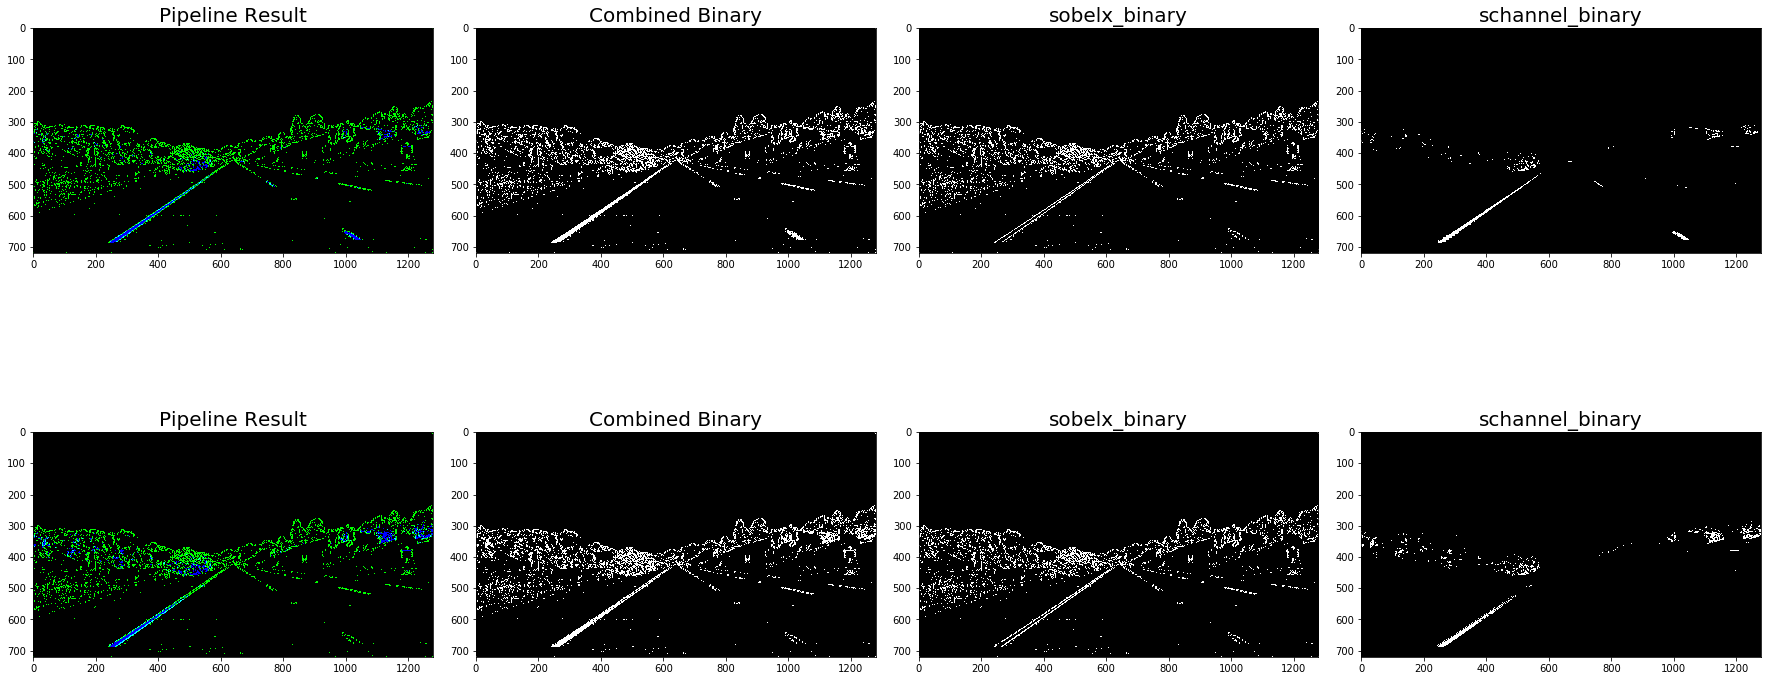

In [13]:
# Plot the result
f, ((ax2, ax3, ax4, ax5) , (ax6, ax7, ax8, ax9)) = plt.subplots(2, 4, figsize=(24, 12))
f.tight_layout()

#ax1.imshow(image)
#ax1.set_title('Original Image', fontsize=30)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=20)

ax3.imshow(combined_binary, cmap='gray')
ax3.set_title('Combined Binary', fontsize=20)

ax4.imshow(sobelx_binary, cmap='gray')
ax4.set_title('sobelx_binary', fontsize=20)

ax5.imshow(schannel_binary, cmap='gray')
ax5.set_title('schannel_binary', fontsize=20)

ax6.imshow(result_hsv)
ax6.set_title('Pipeline Result', fontsize=20)

ax7.imshow(combined_binary_hsv, cmap='gray')
ax7.set_title('Combined Binary', fontsize=20)

ax8.imshow(sobelx_binary_hsv, cmap='gray')
ax8.set_title('sobelx_binary', fontsize=20)

ax9.imshow(schannel_binary_hsv, cmap='gray')
ax9.set_title('schannel_binary', fontsize=20)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)